In [1]:
import streamlit as st
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset

In [2]:
df = pd.read_csv('TASK-ML-INTERN.csv')
df

,hsi_id,0,1,2,3,4,5,6,7,8,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
0,imagoai_corn_0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,...,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520,1100.0
1,imagoai_corn_1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,...,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054,1000.0
2,imagoai_corn_2,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,...,0.683054,0.669286,0.663179,0.676165,0.676591,0.655951,0.658945,0.670989,0.665176,1300.0
3,imagoai_corn_3,0.468837,0.473255,0.462949,0.459335,0.461672,0.459824,0.458194,0.427737,0.415360,...,0.742782,0.730801,0.736787,0.730044,0.751437,0.738497,0.742446,0.754657,0.733474,1300.0
4,imagoai_corn_4,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,...,0.770227,0.773013,0.761431,0.763488,0.762473,0.744012,0.775486,0.760431,0.751988,220.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,imagoai_corn_495,0.478140,0.444033,0.442120,0.437473,0.428672,0.413238,0.417758,0.420388,0.413290,...,0.747858,0.730535,0.716969,0.739297,0.724827,0.720484,0.740626,0.740116,0.721839,1200.0
496,imagoai_corn_496,0.409367,0.394941,0.380236,0.375340,0.346122,0.354650,0.361170,0.342974,0.352137,...,0.670232,0.659045,0.661587,0.658422,0.644254,0.646479,0.656779,0.646700,0.646733,0.0
497,imagoai_corn_497,0.486526,0.501372,0.500175,0.508139,0.489411,0.457311,0.462321,0.462927,0.442647,...,0.787532,0.780347,0.768362,0.771411,0.770919,0.761464,0.770314,0.763324,0.797187,0.0
498,imagoai_corn_498,0.464595,0.498822,0.489077,0.453381,0.487636,0.461950,0.461671,0.447362,0.451952,...,0.739432,0.759722,0.752118,0.761910,0.761111,0.730431,0.753545,0.749619,0.756383,0.0


# Separate spectral data and target variable

In [3]:
spectral_data = df.iloc[:, 1:-1]  #first column is ID, last is target
vomitoxin_ppb = df['vomitoxin_ppb']

# Visualize average spectral reflectance across samples

In [4]:
plt.figure(figsize=(12, 6))
plt.plot(normalized_data.mean(axis=0))
plt.xlabel("Spectral Band")
plt.ylabel("Average Reflectance")
plt.title("Average Spectral Reflectance across Bands")
plt.show()

NameError: name 'normalized_data' is not defined

<Figure size 864x432 with 0 Axes>

# Heatmap for Sample Comparisons

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(spectral_data.iloc[:50, :].T, cmap="viridis", cbar=True)
plt.xlabel("Samples")
plt.ylabel("Spectral Bands")
plt.title("Spectral Band Heatmap for First 50 Samples")
plt.show()

# Normalize spectral data

In [5]:
scaler = StandardScaler()
normalized_data = scaler.fit_transform(spectral_data)

# Split the dataset into training and testing sets

In [6]:
X_train, X_test, y_train, y_test = train_test_split(normalized_data, vomitoxin_ppb, test_size=0.2, random_state=42)

# Perform PCA for dimensionality reduction

In [7]:
pca = PCA(n_components=10)  # Increased components for better variance retention
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Plot cumulative explained variance

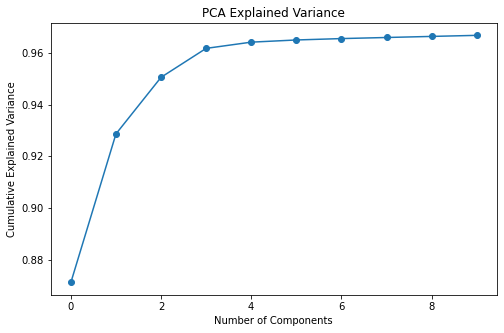

In [8]:
explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance")
plt.show()

# 3D PCA Scatter Plot

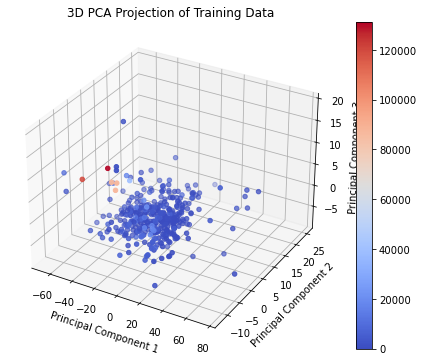

In [9]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], X_train_pca[:, 2], c=y_train, cmap='coolwarm')
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.set_title("3D PCA Projection of Training Data")
plt.colorbar(sc)
plt.show()

# Feature Importance Analysis

In [10]:
rf_temp = RandomForestRegressor(n_estimators=100, random_state=42)
rf_temp.fit(X_train_pca, y_train)
feature_importances = rf_temp.feature_importances_
important_features = np.argsort(feature_importances)[::-1][:15]  # Keep top 15 features
X_train_pca_selected = X_train_pca[:, important_features]
X_test_pca_selected = X_test_pca[:, important_features]

# Train Random Forest model

In [11]:
rf_model = RandomForestRegressor(n_estimators=200, max_depth=None, random_state=42)
rf_model.fit(X_train_pca, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

# Feature Importance Visualization

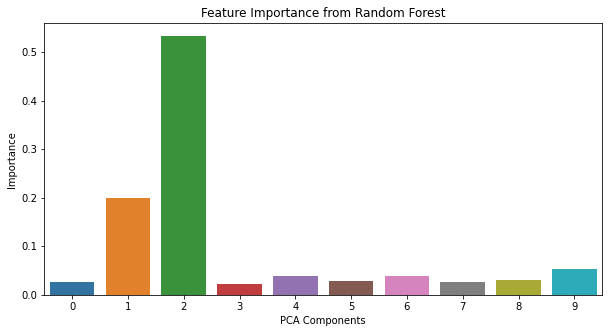

In [13]:
feature_importances = rf_model.feature_importances_
plt.figure(figsize=(10, 5))
sns.barplot(x=np.arange(len(feature_importances)), y=feature_importances)
plt.xlabel("PCA Components")
plt.ylabel("Importance")
plt.title("Feature Importance from Random Forest")
plt.show()

# Hyperparameter tuning for Random Forest

In [14]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(X_train_pca, y_train)

best_model = grid_search.best_estimator_

# Evaluate model

In [15]:
y_pred_rf = best_model.predict(X_test_pca)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest - MAE: {mae_rf}, RMSE: {rmse_rf}, R²: {r2_rf}")

Random Forest - MAE: 2106.8558999999996, RMSE: 5099.632220612973, R²: 0.9069654091910249


# Actual vs. Predicted Scatter Plot

2025-03-13 19:44:37.440 INFO    numexpr.utils: NumExpr defaulting to 8 threads.


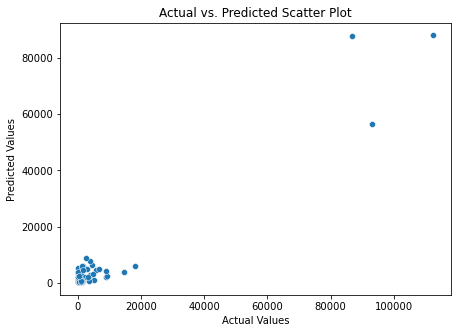

In [16]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Scatter Plot")
plt.show()

# Residual Plot

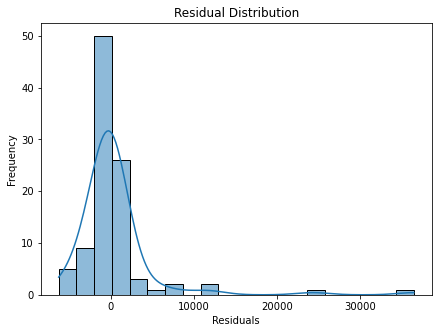

In [17]:
residuals = y_test - y_pred_rf
plt.figure(figsize=(7, 5))
sns.histplot(residuals, bins=20, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()

# Prediction Distribution

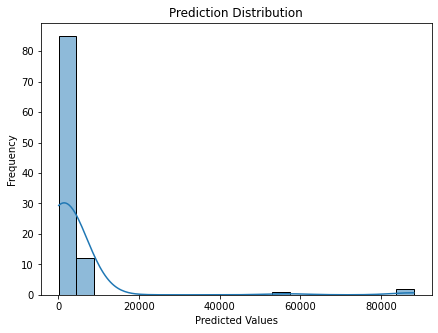

In [18]:
plt.figure(figsize=(7, 5))
sns.histplot(y_pred_rf, bins=20, kde=True)
plt.xlabel("Predicted Values")
plt.ylabel("Frequency")
plt.title("Prediction Distribution")
plt.show()

# Save the Model

In [19]:
with open('random_forest_model.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)
with open('pca_transformer.pkl', 'wb') as pca_file:
    pickle.dump(pca, pca_file)
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)